In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os, warnings

import cv2 as cv

import matplotlib.pyplot as plt

img_path = "../input/utkface-new/UTKFace"

img_files = os.listdir(img_path)

SAMPLE_SIZE = 10000
IMAGE_SIZE = 128

labels = []
images = []

i = 0
while(i < SAMPLE_SIZE):
    labels.append([[int(img_files[i].split('_')[0])], [int(img_files[i].split('_')[1])]])
    
    img = cv.imread(img_path + '/' + img_files[i])
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    images.append(img)
    
    i += 1

In [20]:
X = np.array(images) / 255
Y = np.array(labels)

print(X[0:2])
print(Y[0:2])

[[[[0.05882353 0.03529412 0.03529412]
   [0.03529412 0.01960784 0.02352941]
   [0.03137255 0.01960784 0.02745098]
   ...
   [0.17647059 0.08235294 0.04705882]
   [0.23921569 0.1372549  0.11372549]
   [0.27058824 0.16078431 0.14509804]]

  [[0.06666667 0.04313725 0.04313725]
   [0.02745098 0.01176471 0.01568627]
   [0.02352941 0.01176471 0.01960784]
   ...
   [0.15294118 0.04705882 0.01960784]
   [0.21176471 0.09803922 0.07843137]
   [0.25490196 0.14117647 0.1254902 ]]

  [[0.09411765 0.06666667 0.06666667]
   [0.03137255 0.00784314 0.00784314]
   [0.01960784 0.00392157 0.00784314]
   ...
   [0.1372549  0.01960784 0.00784314]
   [0.2        0.07058824 0.05882353]
   [0.25882353 0.13333333 0.12156863]]

  ...

  [[0.18039216 0.18039216 0.18039216]
   [0.14509804 0.14509804 0.14509804]
   [0.09411765 0.09411765 0.09411765]
   ...
   [0.01568627 0.01176471 0.03137255]
   [0.01568627 0.01176471 0.03137255]
   [0.01960784 0.01568627 0.03529412]]

  [[0.15686275 0.15686275 0.15686275]
   [0.1

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

Y_train_final = [Y_train[:, 0], Y_train[:, 1]]
Y_test_final = [Y_test[:, 0], Y_test[:, 1]]

(8000, 128, 128, 3)
(2000, 128, 128, 3)


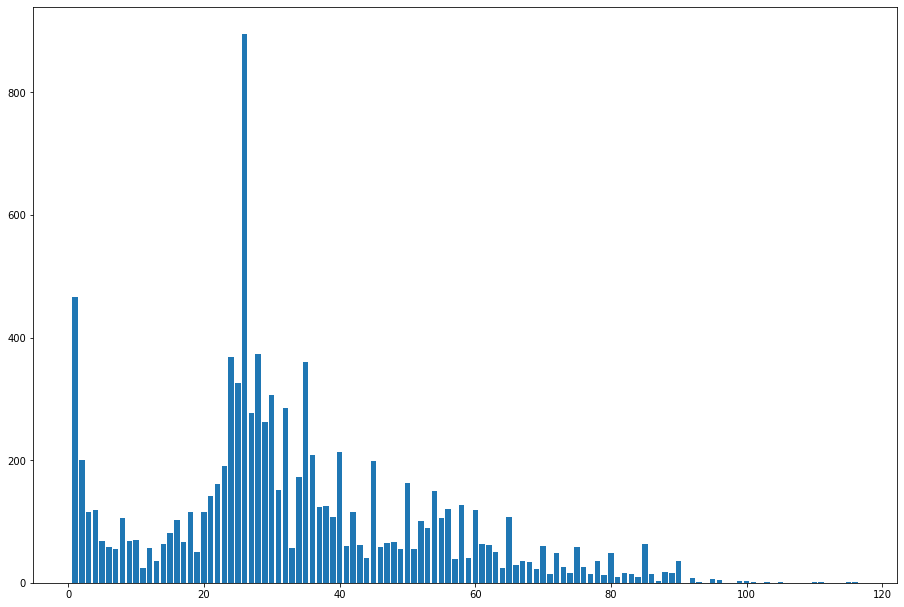

In [22]:
values, counts = np.unique(Y[:, 0], return_counts = True)

fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 2])
axes.bar(values, counts)
plt.show()

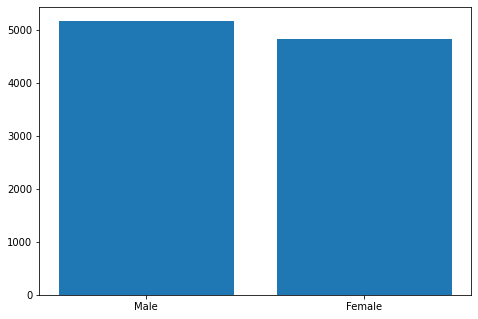

In [23]:
values, counts = np.unique(Y[:, 1], return_counts=True)

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(['Male', 'Female'], [counts[0], counts[1]])
plt.show()

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

initial_model = keras.Sequential([
    layers.Conv2D(filters = 16, kernel_size = 3, activation = 'relu', padding = 'same',
                  input_shape = [IMAGE_SIZE, IMAGE_SIZE, 3]),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(),

    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),

    layers.Dense(1, activation = 'relu', name = 'age'),
    layers.Dense(1, activation = 'sigmoid', name = 'gender'),
])

model = keras.Model(
     inputs = initial_model.inputs,
     outputs = [initial_model.get_layer(name = "age").output, initial_model.get_layer(name = "gender").output]
)

model.compile(
    optimizer = 'adam',
    loss = ['mse', 'binary_crossentropy'],
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    Y_train_final,
    batch_size = 32,
    validation_data = (X_test, Y_test_final),
    epochs = 20,
)

Epoch 1/20
250/250 [==============================] - 115s 457ms/step - loss: 541.5687 - age_loss: 520.3767 - gender_loss: 21.1921 - age_accuracy: 0.0493 - gender_accuracy: 0.5154 - val_loss: 348.1823 - val_age_loss: 329.4525 - val_gender_loss: 18.7298 - val_age_accuracy: 0.0425 - val_gender_accuracy: 0.4990
Epoch 2/20
250/250 [==============================] - 112s 447ms/step - loss: 360.3777 - age_loss: 342.1718 - gender_loss: 18.2059 - age_accuracy: 0.0468 - gender_accuracy: 0.5175 - val_loss: 271.7213 - val_age_loss: 258.2779 - val_gender_loss: 13.4435 - val_age_accuracy: 0.0410 - val_gender_accuracy: 0.4990
Epoch 3/20
250/250 [==============================] - 112s 449ms/step - loss: 239.8158 - age_loss: 226.1773 - gender_loss: 13.6386 - age_accuracy: 0.0458 - gender_accuracy: 0.5271 - val_loss: 189.8795 - val_age_loss: 177.0400 - val_gender_loss: 12.8396 - val_age_accuracy: 0.0425 - val_gender_accuracy: 0.4985
Epoch 4/20
250/250 [==============================] - 115s 459ms/step 

In [27]:
i = 3316
gender = ['Male', 'Female']
print("Actual Age: " + str(int(img_files[i].split('_')[0])))
print("Actual Gender: " + gender[int(img_files[i].split('_')[1])])

image = X[i]
prediction = model.predict(np.array([image]))
print("Predicted Age: " + str(int(np.round(prediction[0][0]))))
print("Predicted Gender: " + gender[int(np.round(prediction[1][0]))])


Actual Age: 28
Actual Gender: Female
Predicted Age: 26
Predicted Gender: Female


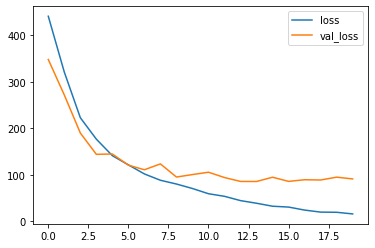

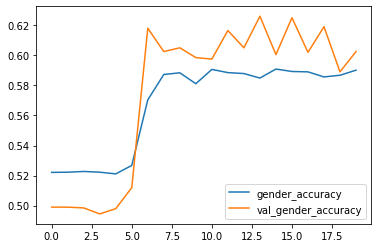

In [28]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['gender_accuracy', 'val_gender_accuracy']].plot();

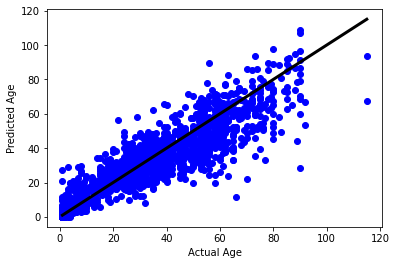

In [29]:
predictions = model.predict(X_test)

plt.scatter(Y_test_final[0], predictions[0], color = 'blue')
plt.plot([Y_test_final[0].min(), Y_test_final[0].max()], [Y_test_final[0].min(), Y_test_final[0].max()], color = 'black', linewidth = 3)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.show()

              precision    recall  f1-score   support

           0       0.63      0.51      0.56       998
           1       0.59      0.70      0.64      1002

    accuracy                           0.60      2000
   macro avg       0.61      0.60      0.60      2000
weighted avg       0.61      0.60      0.60      2000



<AxesSubplot:>

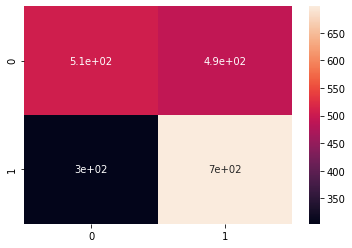

In [32]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

import seaborn as sns

gender_pred = list(map(lambda e : int(np.round(e)), predictions[1]))

report = classification_report(Y_test_final[1], gender_pred)
results = confusion_matrix(Y_test_final[1], gender_pred)

print(report)
sns.heatmap(results, annot = True)